# OBJECTIVE:
Predict the carbon emissions and energy consumption. 

# KEY FEATURES:

*   ***Entity:*** The name of the country or region for which the data is reported (RELEVANT TO THE INVESTIGATION).

*   ***Year:*** The year for which the data is reported, ranging from 2000 to 2020 (RELEVANT TO THE INVESTIGATION).

*   ***Access to electricity (% of population):*** The percentage of population with access to electricity (RELEVANT TO THE ELECTRICITY FORCASTING).

*   ***Access to clean fuels for cooking (% of population):*** The percentage of the population with primary reliance on clean fuels (RELEVANT TO THE INVESTIGATION).

*   ***Renewable-electricity-generating-capacity-per-capita:*** Installed Renewable energy capacity per person

*   ***Financial flows to developing countries (US $):*** Aid and assistance from developed countries for clean energy projects.

*   ***Renewable energy share in total final energy consumption (%):*** Percentage of renewable energy in final energy consumption.

*   ***Electricity from fossil fuels (TWh):*** Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.

*   ***Electricity from nuclear (TWh):*** Electricity generated from nuclear power in terawatt-hours.

*   ***Electricity from renewables (TWh):*** Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.

*   ***Low-carbon electricity (% electricity):*** Percentage of electricity from low-carbon sources (nuclear and renewables).

*   ***Primary energy consumption per capita (kWh/person) -- TARGET:*** Energy consumption per person in kilowatt-hours.

*   ***Energy intensity level of primary energy (MJ/$2011 PPP GDP):*** Energy use per unit of GDP at purchasing power parity.

*   ***Value_co2_emissions (metric tons per capita) -- TARGET:*** Carbon dioxide emissions per person in metric tons.

*   ***Renewables (% equivalent primary energy):*** Equivalent primary energy that is derived from renewable sources.

*   ***GDP growth (annual %):*** Annual GDP growth rate based on constant local currency.

*   ***GDP per capita:*** Gross domestic product per person.

*   ***Density (P/Km2):*** Population density in persons per square kilometer.

*   ***Land Area (Km2):*** Total land area in square kilometers.

*   ***Latitude:*** Latitude of the country's centroid in decimal degrees.

*   ***Longitude:*** Longitude of the country's centroid in decimal degrees.

##### NOTE: In parentesis and mayus, we have the variable importance for our investigation (2 targets).

In [5]:
# LIBRARIES:
import pandas as pd
import numpy as np

# SHOWCASTING THE DATA:
pd.set_option("display.max_column", None)

In [2]:
# IMPORTING DATA:
df = pd.read_csv(r"/Users/alberto/Downloads/PROJECTS/MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS/Machine Learning on Cloud/global-data-on-sustainable-energy.csv")
df.head(10)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,"6,52,230",33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,"6,52,230",33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,"6,52,230",33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,73.972600,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,"6,52,230",33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,82.978720,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,"6,52,230",33.93911,67.709953


In [3]:
# SIZE OF THE DATA:
df.shape

(3649, 21)

In [4]:
# CHECKING THE DATA STATISTIC OF THE DATA:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


In [11]:
# MISSING DATA ON THE DATASET (TOTAL):
sum_missing = df.isna().sum().sort_values(ascending = False)
percentage_missing = (df.isna().mean()*100).sort_values(ascending = False)

names = sum_missing.index.to_list()                                     # Storing names
sum_values = sum_missing.to_list()                                      # Getting count of missing values
perc_values = np.around(percentage_missing.to_list(), 3)                # Getting percentage of missing values
df_missing_values = pd.DataFrame({"NAMES" : names,                      # Presenting the data as a dataframe
                                  "VALUE COUNT" : sum_values,
                                  "PERCENTAGE (%)" : perc_values})
df_missing_values

,NAMES,VALUE COUNT,PERCENTAGE (%)
0,Renewables (% equivalent primary energy),2137,58.564
1,Financial flows to developing countries (US $),2089,57.249
2,Renewable-electricity-generating-capacity-per-...,931,25.514
3,Value_co2_emissions_kt_by_country,428,11.729
4,gdp_growth,317,8.687
5,gdp_per_capita,282,7.728
6,Energy intensity level of primary energy (MJ/$...,207,5.673
7,Renewable energy share in the total final ener...,194,5.317
8,Access to clean fuels for cooking,169,4.631
9,Electricity from nuclear (TWh),126,3.453


Due to a high proportion of missing values (exceeding 20%) in the initial three columns, it becomes challenging to effectively impute them. Therefore, a practical approach would be to discard these columns and proceed with the remaining ones.

In [12]:
# # TAKING THE COLUMNS THAT HAVE A LOT OF MISSING VALUES:
# names_todelete = df_missing_values[df_missing_values["PERCENTAGE (%)"] > 20]["NAMES"].tolist()
# names_todelete
# # PENDING ON THE CHECKING WITH GROUP BY

['Renewables (% equivalent primary energy)',
 'Financial flows to developing countries (US $)',
 'Renewable-electricity-generating-capacity-per-capita']

In [13]:
df["Entity"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Icelan

In [15]:
len(df["Entity"].unique())

176

In [12]:
entity = df.groupby("Entity")
entity.get_group("Afghanistan")

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,"6,52,230",33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,"6,52,230",33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,"6,52,230",33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,73.972600,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,"6,52,230",33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,82.978720,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,"6,52,230",33.93911,67.709953


In [20]:
df[["Entity", "Renewables (% equivalent primary energy)"]]

,Entity,Renewables (% equivalent primary energy)
0,Afghanistan,NaN
1,Afghanistan,NaN
2,Afghanistan,NaN
3,Afghanistan,NaN
4,Afghanistan,NaN
...,...,...
3644,Zimbabwe,NaN
3645,Zimbabwe,NaN
3646,Zimbabwe,NaN
3647,Zimbabwe,NaN


In [21]:
df.nunique()

Entity                                                               176
Year                                                                  21
Access to electricity (% of population)                             2040
Access to clean fuels for cooking                                    896
Renewable-electricity-generating-capacity-per-capita                2110
Financial flows to developing countries (US $)                      1017
Renewable energy share in the total final energy consumption (%)    2587
Electricity from fossil fuels (TWh)                                 1859
Electricity from nuclear (TWh)                                       547
Electricity from renewables (TWh)                                   1533
Low-carbon electricity (% electricity)                              2647
Primary energy consumption per capita (kWh/person)                  3628
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1044
Value_co2_emissions_kt_by_country                  

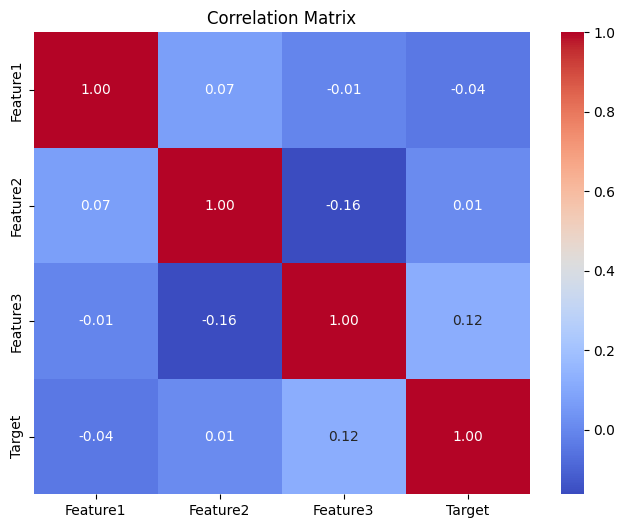

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration
data = {
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Feature3': np.random.rand(100),
    'Target': np.random.randint(0, 2, 100)  # Binary classification target
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [23]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
